In [1]:
from markovsoccer.team_model import TeamModel
from markovsoccer.features import SideUsage, SideUsageShot, InwardsOutwardsPreference, SpeedOfPlay, LongBalls, \
    LongGoalKicks, SuccessfulCounterattackProbability

In [2]:
model_path = "../models/Arsenal.prism"
team_model = TeamModel.read_from(model_path)

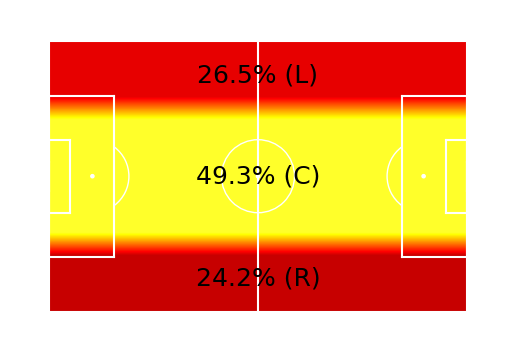

In [3]:
SideUsage.visualize(team_model)

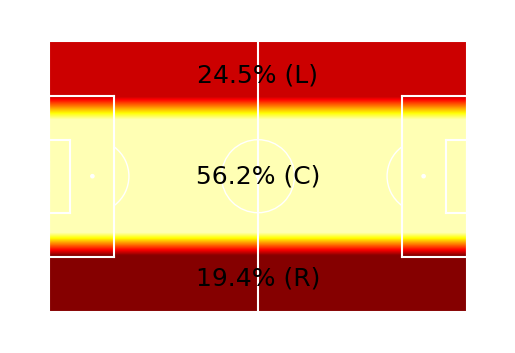

In [4]:
SideUsageShot.visualize(team_model)

In [5]:
InwardsOutwardsPreference.calculate(team_model)

{'inwards': 0.375, 'outwards': 0.19}

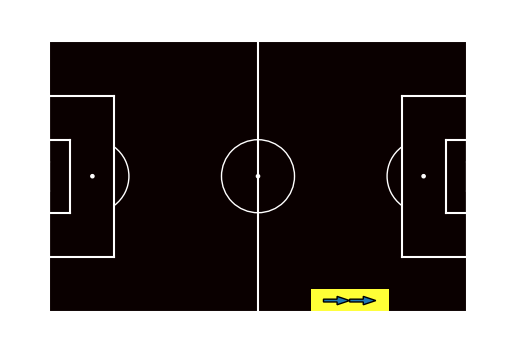

In [6]:
InwardsOutwardsPreference.visualize_most_likely_subsequences(team_model, 1)

In [7]:
SpeedOfPlay.calculate(team_model)

13.236505564966293

In [8]:
LongBalls.calculate(team_model)

0.102953828505879

In [9]:
LongGoalKicks.calculate(team_model)

0.4266666666666666

In [10]:
SuccessfulCounterattackProbability.calculate(team_model)

0.02271294228394484